# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

import random

# Data Loading

In [ ]:
df = pd.read_csv("/work/datasets/full_data_sleeps.csv")
df.head(5)

,userId,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
0,1,4,23,1617,1852,216,0.9191,19,21,1719,700,11975,8.85,12,0.2809,1,104
1,1,4,24,1833,2170,287,0.8516,50,20,1761,755,11712,8.05,19,0.2302,1,139
2,1,4,25,1526,2003,413,0.8658,64,28,1850,868,12898,8.72,8,0.2473,0,0
3,1,4,26,1593,1941,293,0.8420,55,26,1795,805,12306,8.25,20,0.2749,0,0
4,1,4,27,1532,1912,329,0.8658,51,27,1848,894,9207,6.16,15,0.2891,0,0


### Adding Metadata:

-> Add Columuns for Age, BMI and ISI in df

-> Match userId from df and df_meta_data

-> Insert Age, BMI and ISI into df

In [ ]:
# Combining the two datasets

headerList = ['userId', 'bmi', 'isi', 'age']

df_meta_data = pd.read_csv("/work/datasets/full_meta-data_sleeps.csv")
df_meta_data.to_csv("/work/datasets/full_meta-data_sleeps2.csv", header=headerList, index=False)
df_meta_final = pd.read_csv('/work/datasets/full_meta-data_sleeps2.csv')

df_final = pd.merge(df_meta_final, df, on='userId', how='inner')
df_final.to_csv("/work/datasets/df_master.csv")

df_final.head(10)

,userId,bmi,isi,age,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
0,1,16.2,17,20,4,23,1617,1852,216,0.9191,19,21,1719,700,11975,8.85,12,0.2809,1,104
1,1,16.2,17,20,4,24,1833,2170,287,0.8516,50,20,1761,755,11712,8.05,19,0.2302,1,139
2,1,16.2,17,20,4,25,1526,2003,413,0.8658,64,28,1850,868,12898,8.72,8,0.2473,0,0
3,1,16.2,17,20,4,26,1593,1941,293,0.8420,55,26,1795,805,12306,8.25,20,0.2749,0,0
4,1,16.2,17,20,4,27,1532,1912,329,0.8658,51,27,1848,894,9207,6.16,15,0.2891,0,0
5,1,16.2,17,20,4,28,1619,1989,341,0.9216,29,29,1997,1097,12121,8.06,20,0.3648,0,0
6,1,16.2,17,20,4,29,1564,1933,331,0.8970,38,18,1479,403,3740,2.49,6,0.1630,1,62
7,1,16.2,17,20,4,30,1570,1899,282,0.8571,47,31,1681,662,9657,6.42,15,0.2146,0,0
8,1,16.2,17,20,5,1,1477,2050,490,0.8551,83,34,1683,656,9420,6.26,11,0.2041,0,0
9,1,16.2,17,20,5,2,1455,1741,253,0.8846,33,17,1672,635,9961,6.72,13,0.2327,0,0


In [ ]:
df_final.describe()

,userId,bmi,isi,age,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,25.595238,21.962381,18.380952,23.000000,4.880952,17.000000,1525.757370,1927.228458,350.328231,0.780248,50.863946,22.825964,2339.307823,993.523243,9889.066327,6.915465,13.079365,0.238871,0.143424,22.829932
std,14.348570,3.376490,2.204003,2.752403,0.497868,9.703021,379.056069,467.525752,135.300797,0.410703,28.359668,13.916850,618.907493,547.462509,5015.351738,3.564202,12.042911,0.114005,0.499979,54.692390
min,1.000000,15.990000,15.000000,18.000000,4.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,13.000000,19.380000,17.000000,21.000000,5.000000,8.000000,1515.000000,1940.000000,280.750000,0.844475,35.000000,14.000000,1877.000000,634.750000,6622.250000,4.597500,5.000000,0.166325,0.000000,0.000000
50%,25.500000,21.590000,18.000000,23.000000,5.000000,18.500000,1598.000000,2016.500000,362.000000,0.870350,51.000000,25.000000,2202.500000,921.000000,9566.000000,6.590000,11.000000,0.232750,0.000000,0.000000
75%,36.000000,23.940000,20.000000,26.000000,5.000000,26.000000,1684.000000,2107.000000,433.000000,0.896925,67.000000,33.000000,2736.250000,1287.250000,12813.500000,8.920000,17.000000,0.305475,0.000000,0.000000
max,50.000000,29.310000,23.000000,29.000000,6.000000,31.000000,2147.000000,2902.000000,814.000000,1.000000,386.000000,67.000000,4840.000000,3503.000000,33654.000000,24.030000,128.000000,0.996500,2.000000,386.000000


In [ ]:
df_final.isnull().sum()  # missiing values are set as -1

userId              0
bmi                 0
isi                 0
age                 0
month               0
date                0
sleep_start_time    0
sleep_end_time      0
sleep_min           0
sleep_efficiency    0
awaken_min          0
awaken_moments      0
cal_consume         0
active_cal          0
walks               0
distance            0
stairs              0
active_ratio        0
nap_total_freq      0
nap_total_time      0
dtype: int64

### Converting missing values to NaN:

In [ ]:
def Fillnan(csv_data):
    for i in range(csv_data.shape[0]):
        for j in range(csv_data.shape[1]):
            if csv_data.iloc[i, j] == -1:
                csv_data.iloc[i, j] = np.nan
    return csv_data

In [ ]:
df_final = Fillnan(df_final)
feature_name = list(df_final.columns)

In [ ]:
df_final.isnull().sum()

userId               0
bmi                  0
isi                  0
age                  0
month                0
date                 0
sleep_start_time    88
sleep_end_time      88
sleep_min           88
sleep_efficiency    88
awaken_min          88
awaken_moments      88
cal_consume          0
active_cal           0
walks                0
distance             0
stairs               0
active_ratio         0
nap_total_freq      88
nap_total_time      88
dtype: int64

In [ ]:
df_final.describe()

,userId,bmi,isi,age,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1676.000000,1676.000000
mean,25.595238,21.962381,18.380952,23.000000,4.880952,17.000000,1605.921241,2028.471957,368.775060,0.873721,53.587112,24.076969,2339.307823,993.523243,9889.066327,6.915465,13.079365,0.238871,0.203461,24.081146
std,14.348570,3.376490,2.204003,2.752403,0.497868,9.703021,149.460078,156.430305,111.547391,0.047865,26.415648,13.132552,618.907493,547.462509,5015.351738,3.564202,12.042911,0.114005,0.436827,55.830185
min,1.000000,15.990000,15.000000,18.000000,4.000000,1.000000,720.000000,1079.000000,18.000000,0.209300,0.000000,0.000000,1112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,19.380000,17.000000,21.000000,5.000000,8.000000,1529.000000,1950.000000,296.000000,0.848900,37.000000,17.000000,1877.000000,634.750000,6622.250000,4.597500,5.000000,0.166325,0.000000,0.000000
50%,25.500000,21.590000,18.000000,23.000000,5.000000,18.500000,1605.000000,2023.000000,369.500000,0.873100,52.000000,25.000000,2202.500000,921.000000,9566.000000,6.590000,11.000000,0.232750,0.000000,0.000000
75%,36.000000,23.940000,20.000000,26.000000,5.000000,26.000000,1688.000000,2113.250000,438.000000,0.898525,68.000000,33.000000,2736.250000,1287.250000,12813.500000,8.920000,17.000000,0.305475,0.000000,0.000000
max,50.000000,29.310000,23.000000,29.000000,6.000000,31.000000,2147.000000,2902.000000,814.000000,1.000000,386.000000,67.000000,4840.000000,3503.000000,33654.000000,24.030000,128.000000,0.996500,2.000000,386.000000


In [ ]:
feature_name

['userId',
 'bmi',
 'isi',
 'age',
 'month',
 'date',
 'sleep_start_time',
 'sleep_end_time',
 'sleep_min',
 'sleep_efficiency',
 'awaken_min',
 'awaken_moments',
 'cal_consume',
 'active_cal',
 'walks',
 'distance',
 'stairs',
 'active_ratio',
 'nap_total_freq',
 'nap_total_time']

In [ ]:
df_final.to_csv("/work/datasets/df_master.csv")

### Options for handling missing values:

-> Remove row having missing values => df_drop

-> Take average of values present + random value (0,3) => df_average

In [ ]:
df_drop = df_final.dropna(how='any', axis=0)
df_drop.to_csv("/work/datasets/df_drop.csv")

In [ ]:
df_drop.isnull().sum()

userId              0
bmi                 0
isi                 0
age                 0
month               0
date                0
sleep_start_time    0
sleep_end_time      0
sleep_min           0
sleep_efficiency    0
awaken_min          0
awaken_moments      0
cal_consume         0
active_cal          0
walks               0
distance            0
stairs              0
active_ratio        0
nap_total_freq      0
nap_total_time      0
dtype: int64

In [ ]:
df_drop.describe()

,userId,bmi,isi,age,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,25.683174,21.965012,18.377685,23.008353,4.876492,17.005370,1605.921241,2028.471957,368.775060,0.873721,53.587112,24.076969,2338.975537,1010.957041,9962.436754,6.964958,13.131862,0.243250,0.203461,24.081146
std,14.334444,3.394732,2.202837,2.732216,0.501600,9.677207,149.460078,156.430305,111.547391,0.047865,26.415648,13.132552,615.218294,537.055140,4993.285177,3.548976,12.164589,0.110704,0.436827,55.830185
min,1.000000,15.990000,15.000000,18.000000,4.000000,1.000000,720.000000,1079.000000,18.000000,0.209300,0.000000,0.000000,1112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,19.380000,17.000000,21.000000,5.000000,8.000000,1529.000000,1950.000000,296.000000,0.848900,37.000000,17.000000,1877.000000,647.750000,6664.500000,4.677500,5.000000,0.171475,0.000000,0.000000
50%,26.000000,21.550000,18.000000,23.000000,5.000000,18.000000,1605.000000,2023.000000,369.500000,0.873100,52.000000,25.000000,2201.000000,933.500000,9652.000000,6.635000,11.000000,0.235150,0.000000,0.000000
75%,36.000000,23.940000,20.000000,26.000000,5.000000,26.000000,1688.000000,2113.250000,438.000000,0.898525,68.000000,33.000000,2735.250000,1294.000000,12823.500000,8.942500,17.000000,0.309000,0.000000,0.000000
max,50.000000,29.310000,23.000000,29.000000,6.000000,31.000000,2147.000000,2902.000000,814.000000,1.000000,386.000000,67.000000,4840.000000,3503.000000,33654.000000,24.030000,128.000000,0.996500,2.000000,386.000000


In [ ]:
df_average = pd.read_csv("/work/datasets/full_data_sleeps.csv")

In [ ]:
df_average = pd.merge(df_meta_final, df_average, on='userId', how='inner')
df_average.to_csv("/work/datasets/df_average.csv")

In [ ]:
for i in range(df_average.shape[0]):
    for j in range(df_average.shape[1]):
            if df_average.iloc[i, j] == -1:
                df_average.iloc[i, j] = df_drop[df_drop.columns[j]].mean() + random.randrange(4)

In [ ]:
df_average.to_csv("/work/datasets/df_average.csv")

In [ ]:
df_average.head(40)

,userId,bmi,isi,age,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
0,1,16.2,17,20,4,23,1617.000000,1852.000000,216.00000,0.919100,19.000000,21.000000,1719,700,11975,8.85,12,0.2809,1.000000,104.000000
1,1,16.2,17,20,4,24,1833.000000,2170.000000,287.00000,0.851600,50.000000,20.000000,1761,755,11712,8.05,19,0.2302,1.000000,139.000000
2,1,16.2,17,20,4,25,1526.000000,2003.000000,413.00000,0.865800,64.000000,28.000000,1850,868,12898,8.72,8,0.2473,0.000000,0.000000
3,1,16.2,17,20,4,26,1593.000000,1941.000000,293.00000,0.842000,55.000000,26.000000,1795,805,12306,8.25,20,0.2749,0.000000,0.000000
4,1,16.2,17,20,4,27,1532.000000,1912.000000,329.00000,0.865800,51.000000,27.000000,1848,894,9207,6.16,15,0.2891,0.000000,0.000000
5,1,16.2,17,20,4,28,1619.000000,1989.000000,341.00000,0.921600,29.000000,29.000000,1997,1097,12121,8.06,20,0.3648,0.000000,0.000000
6,1,16.2,17,20,4,29,1564.000000,1933.000000,331.00000,0.897000,38.000000,18.000000,1479,403,3740,2.49,6,0.1630,1.000000,62.000000
7,1,16.2,17,20,4,30,1570.000000,1899.000000,282.00000,0.857100,47.000000,31.000000,1681,662,9657,6.42,15,0.2146,0.000000,0.000000
8,1,16.2,17,20,5,1,1477.000000,2050.000000,490.00000,0.855100,83.000000,34.000000,1683,656,9420,6.26,11,0.2041,0.000000,0.000000
9,1,16.2,17,20,5,2,1455.000000,1741.000000,253.00000,0.884600,33.000000,17.000000,1672,635,9961,6.72,13,0.2327,0.000000,0.000000


In [ ]:
df_drop.head(40)

,userId,bmi,isi,age,month,date,sleep_start_time,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
0,1,16.20,17,20,4,23,1617.0,1852.0,216.0,0.9191,19.0,21.0,1719,700,11975,8.85,12,0.2809,1.0,104.0
1,1,16.20,17,20,4,24,1833.0,2170.0,287.0,0.8516,50.0,20.0,1761,755,11712,8.05,19,0.2302,1.0,139.0
2,1,16.20,17,20,4,25,1526.0,2003.0,413.0,0.8658,64.0,28.0,1850,868,12898,8.72,8,0.2473,0.0,0.0
3,1,16.20,17,20,4,26,1593.0,1941.0,293.0,0.8420,55.0,26.0,1795,805,12306,8.25,20,0.2749,0.0,0.0
4,1,16.20,17,20,4,27,1532.0,1912.0,329.0,0.8658,51.0,27.0,1848,894,9207,6.16,15,0.2891,0.0,0.0
5,1,16.20,17,20,4,28,1619.0,1989.0,341.0,0.9216,29.0,29.0,1997,1097,12121,8.06,20,0.3648,0.0,0.0
6,1,16.20,17,20,4,29,1564.0,1933.0,331.0,0.8970,38.0,18.0,1479,403,3740,2.49,6,0.1630,1.0,62.0
7,1,16.20,17,20,4,30,1570.0,1899.0,282.0,0.8571,47.0,31.0,1681,662,9657,6.42,15,0.2146,0.0,0.0
8,1,16.20,17,20,5,1,1477.0,2050.0,490.0,0.8551,83.0,34.0,1683,656,9420,6.26,11,0.2041,0.0,0.0
9,1,16.20,17,20,5,2,1455.0,1741.0,253.0,0.8846,33.0,17.0,1672,635,9961,6.72,13,0.2327,0.0,0.0


In [ ]:
df_average.iloc[34]

userId                 1.000000
bmi                   16.200000
isi                   17.000000
age                   20.000000
month                  5.000000
date                  27.000000
sleep_start_time    1605.921241
sleep_end_time      2030.471957
sleep_min            369.775060
sleep_efficiency       0.873721
awaken_min            54.587112
awaken_moments        24.076969
cal_consume         1421.000000
active_cal             0.000000
walks               4012.000000
distance               2.670000
stairs                10.000000
active_ratio           0.000000
nap_total_freq         2.203461
nap_total_time        25.081146
Name: 34, dtype: float64

# EDA

-> Compare all variables to target variable

-> Correlation map

-> Understanding distribution of each variable through boxplot and histogram

-> Feature engineering of variables

-> Extras - scatterplots, bubble charts

Things to pay attention: outliers

=> Input: all data => ask: sleep_end_time 

=> Monitor => awaken_moment + awaken_min

=> Predict: sleep_start_time

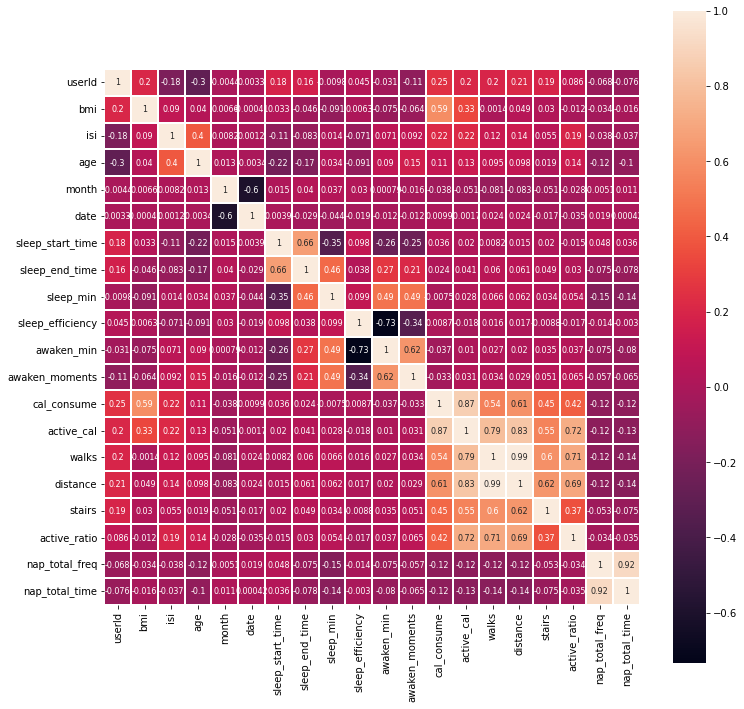

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,12))
dataplot = sns.heatmap(df_drop.corr(), linewidths=2, annot=True, annot_kws={'size': 8}, square=True)
plt.show()
plt.savefig('heatmap.png', dpi=400) 

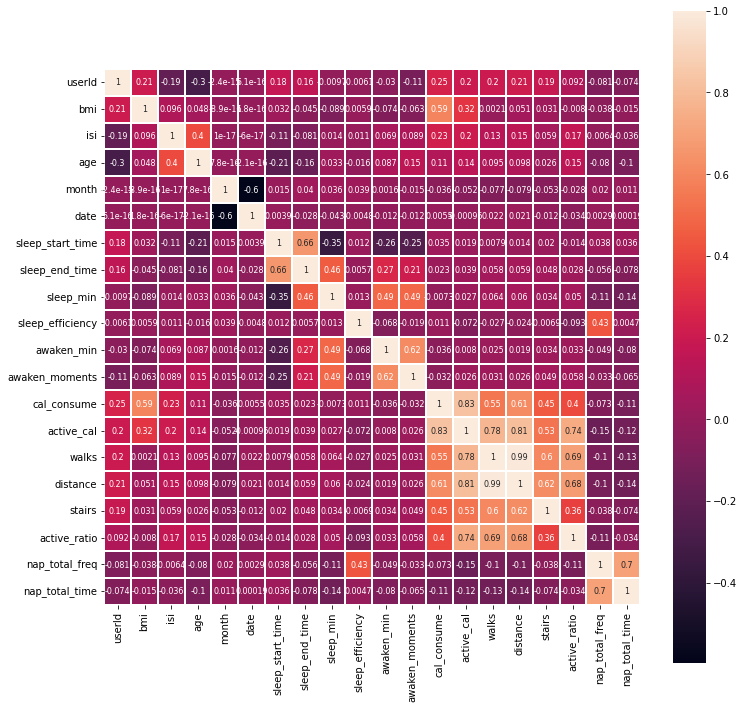

In [ ]:
plt.figure(figsize=(12,12))
dataplot = sns.heatmap(df_average.corr(), linewidths=2, annot=True, annot_kws={'size': 8}, square=True)
plt.show()

In [ ]:
corr = df_drop.corr(method='spearman')   # Getting correlation between the input variables
corr_rate_sorted = corr.sort_values(by = ["sleep_min"], ascending=False, inplace=False, kind='quicksort', na_position='last')

corr_rate_sorted['sleep_min']

sleep_min           1.000000
awaken_min          0.554560
awaken_moments      0.531202
sleep_end_time      0.486233
sleep_efficiency    0.074710
distance            0.062947
walks               0.062849
age                 0.061790
active_ratio        0.059669
month               0.039736
active_cal          0.029831
stairs              0.017850
isi                 0.011321
cal_consume        -0.005019
userId             -0.010585
date               -0.050439
bmi                -0.094704
nap_total_freq     -0.166243
nap_total_time     -0.169116
sleep_start_time   -0.410928
Name: sleep_min, dtype: float64

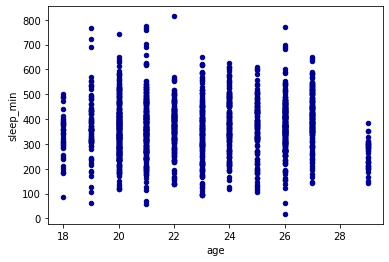

In [ ]:
ax1 = df_drop.plot.scatter(x='age', y='sleep_min', c='DarkBlue')
plt.savefig('agevssleep_min.png', dpi=400) 

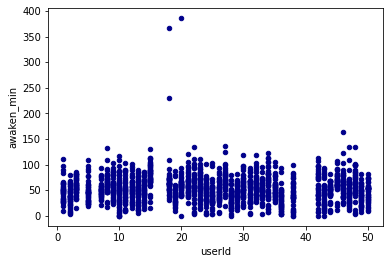

In [ ]:
# Checking the trend among patients for the total minutes awakened during sleep

ax1 = df_drop.plot.scatter(x='userId', y='awaken_min', c='DarkBlue')

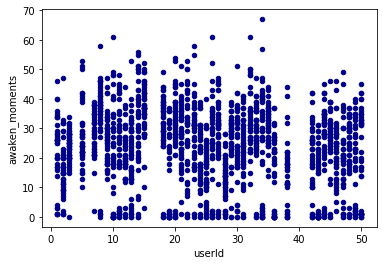

In [ ]:
# Checking the trend among patients for the total number of times awakened during sleep

ax1 = df_drop.plot.scatter(x='userId', y='awaken_moments', c='DarkBlue')

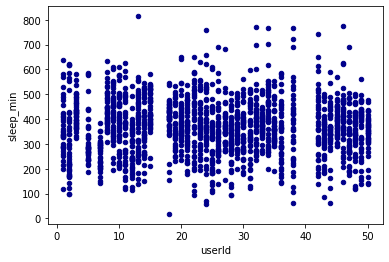

In [ ]:
# Checking the trend among patients for the total minutes spent in sleeping

ax1 = df_drop.plot.scatter(x='userId', y='sleep_min', c='DarkBlue')

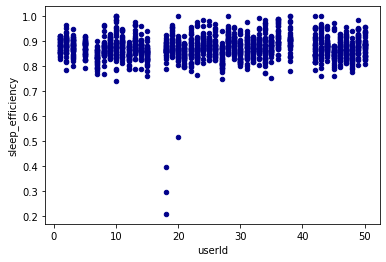

In [ ]:
# Checking the trend among patients for their sleep efficiency

ax1 = df_drop.plot.scatter(x='userId', y='sleep_efficiency', c='DarkBlue')

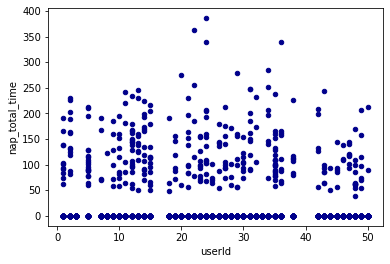

In [ ]:
# Checking the trend among patients for the total minutes spent taking a nap

ax1 = df_drop.plot.scatter(x='userId', y='nap_total_time', c='DarkBlue')

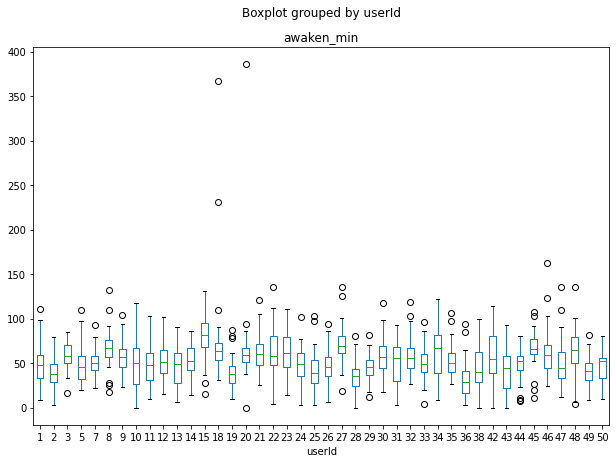

In [ ]:
# Plotting a boxplot for the total minutes awakened during sleep to check for outliers 

df_drop.boxplot(by='userId',column=['awaken_min'],grid=False, figsize=(10,7))
plt.savefig('awaken_min_boxplot.png', dpi=400) 

<AxesSubplot:title={'center':'awaken_moments'}, xlabel='userId'>

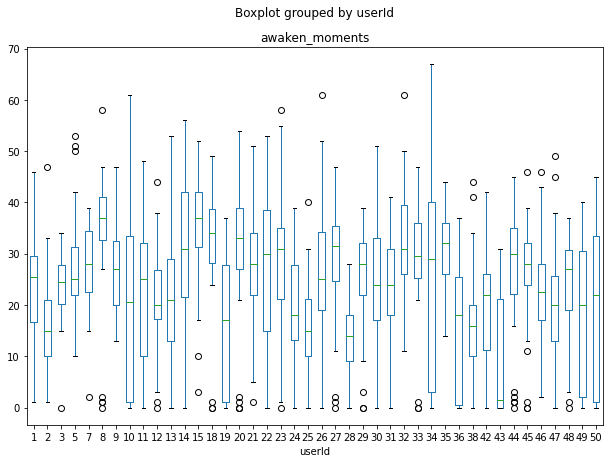

In [ ]:
# Plotting a boxplot for the total number of times awakened during sleep to check for outliers 

df_drop.boxplot(by='userId',column=['awaken_moments'],grid=False, figsize=(10,7))

<AxesSubplot:title={'center':'sleep_min'}, xlabel='userId'>

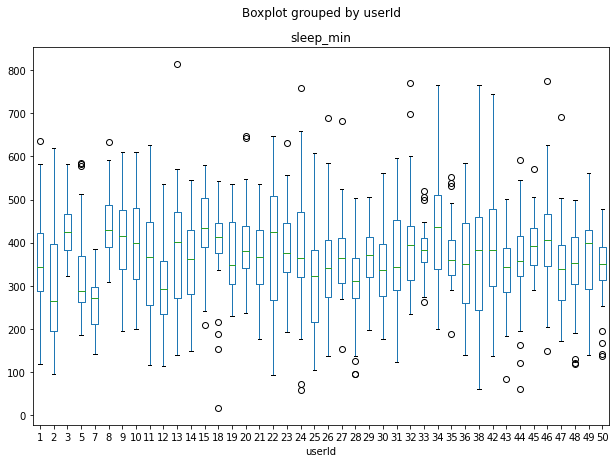

In [ ]:
# Plotting a boxplot for the total minutes spent in sleeping to check for outliers 

df_drop.boxplot(by='userId',column=['sleep_min'],grid=False, figsize=(10,7))

<AxesSubplot:title={'center':'sleep_efficiency'}, xlabel='userId'>

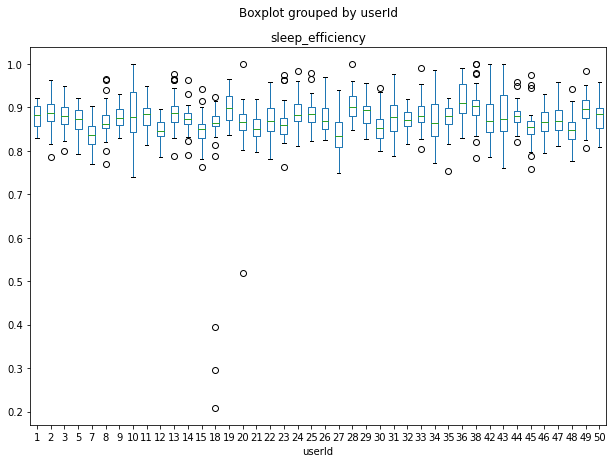

In [ ]:
# Plotting a boxplot for sleep efficiency to check for outliers 

df_drop.boxplot(by='userId',column=['sleep_efficiency'],grid=False, figsize=(10,7))

<AxesSubplot:title={'center':'nap_total_time'}, xlabel='userId'>

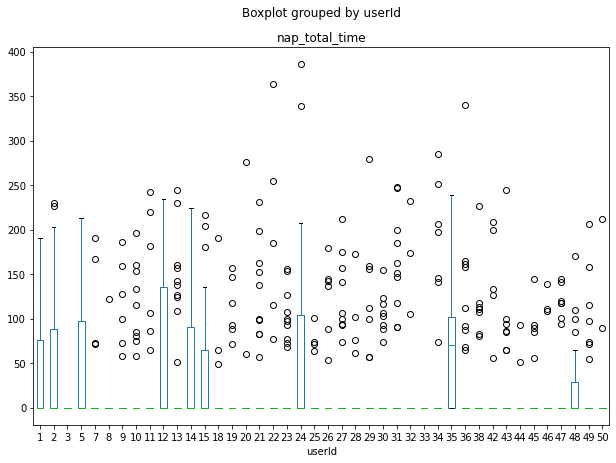

In [ ]:
# Plotting a boxplot for the total minutes spent in taking a nap to check for outliers

df_drop.boxplot(by='userId',column=['nap_total_time'],grid=False, figsize=(10,7))

##### Outliers are not dropped because the study involves patients suffering from insomia

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0e08efc-e855-4fc3-ac3b-2717145dc2a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>